- Collecting all the data for Jakarta in one DataFrame

In [1]:
import pandas as pd

data_jakarta = pd.read_csv('1980-2023 renewable energy data/ninja_pv_-7.2623_112.7361_1980.csv', header=3)
name = "1980-2023 renewable energy data/ninja_pv_-7.2623_112.7361_"

for i in range(1981, 2024):
    data_jakarta = pd.concat([data_jakarta, pd.read_csv(name + str(i) + '.csv', header=3)])

data_jakarta.drop(columns=['time'], inplace=True)
data_jakarta['local_time'] = pd.to_datetime(data_jakarta['local_time'])

- Summing up hourly data to get aggregated yearly data

In [2]:
data_jakarta['local_time'] = data_jakarta['local_time'].dt.year
data_jakarta = data_jakarta.groupby('local_time').sum()
#data_jakarta.reset_index(inplace=True)
data_jakarta = data_jakarta.iloc[:-1,:]

data_jakarta.tail()

,electricity
local_time,
2019,1949969.043
2020,1754165.795
2021,1646240.327
2022,1513700.956
2023,1846196.197


- Visualizing the data

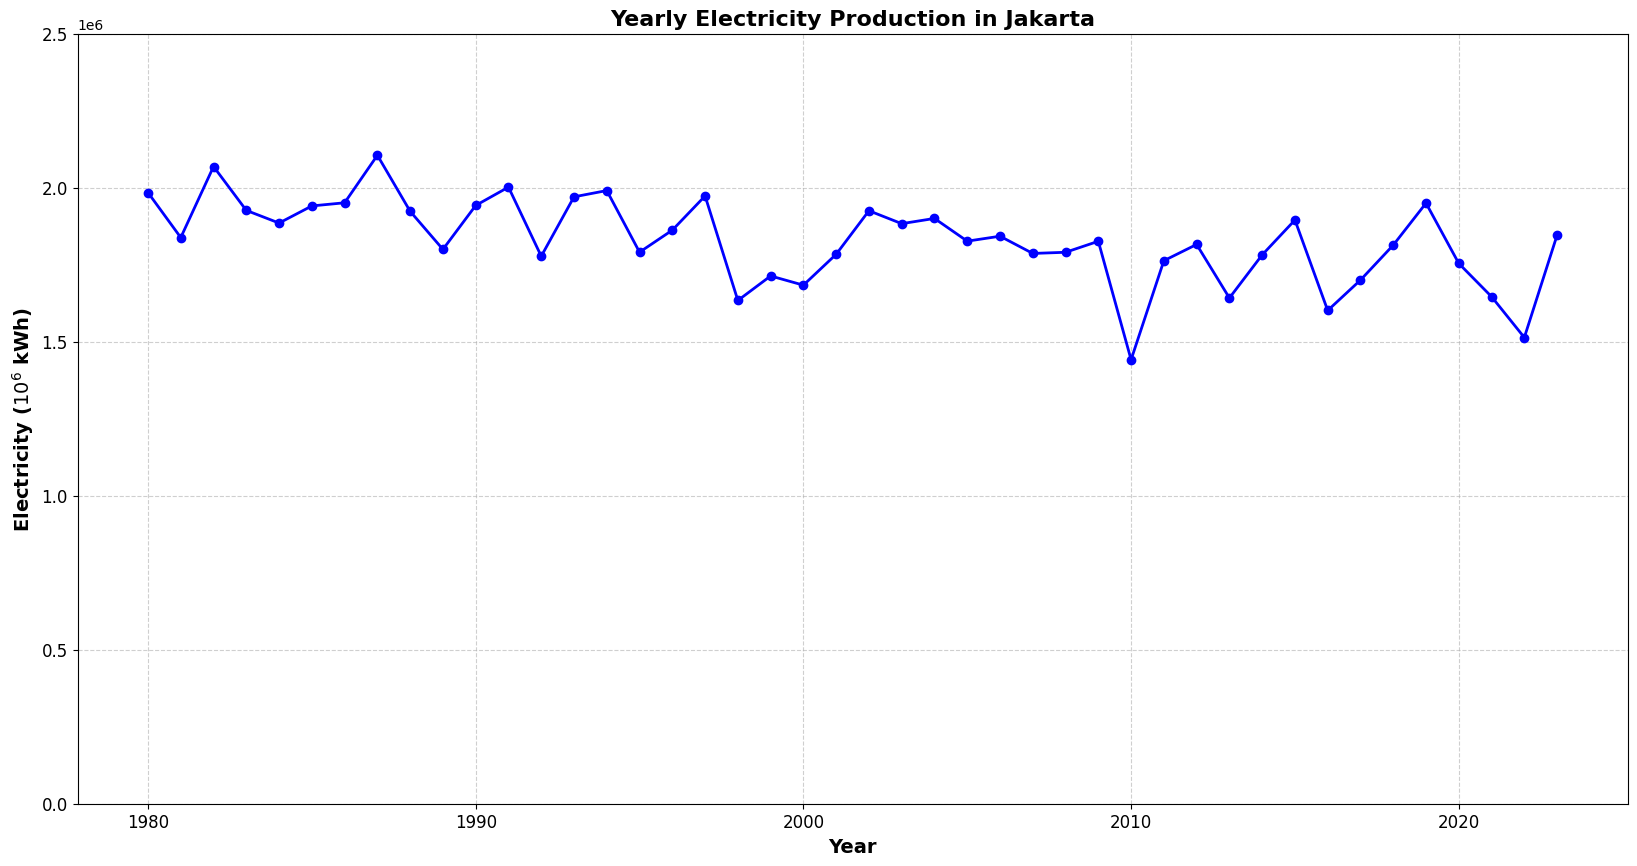

In [3]:
import matplotlib.pyplot as plt

# Create the plot with a larger figure size
plt.figure(figsize=(20,10))

# Plotting the data with customizations
plt.plot(data_jakarta['electricity'], label=name, color='blue', linestyle='-', linewidth=2, marker='o', markersize=6)

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Customizing the labels and title
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Electricity ($10^6$ kWh)', fontsize=14, fontweight='bold')
plt.title('Yearly Electricity Production in Jakarta', fontsize=16, fontweight='bold')

# Adjusting the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding limit to the y-axis
plt.ylim(0, 2500000)

# Save the plot
plt.savefig('visualizations/aggregated_yearly.png')